In [1]:
from collections import defaultdict

neighbors = defaultdict(set)

with open("./gr_qc_coauthorships.txt") as f:
    for line in f.readlines():
        v1, v2 = line.split()
        v1, v2 = int(v1), int(v2)
        neighbors[v1].add(v2)
        neighbors[v2].add(v1)

degrees = [len(v) for v in neighbors.values()]
len(degrees)

4158

# 1a

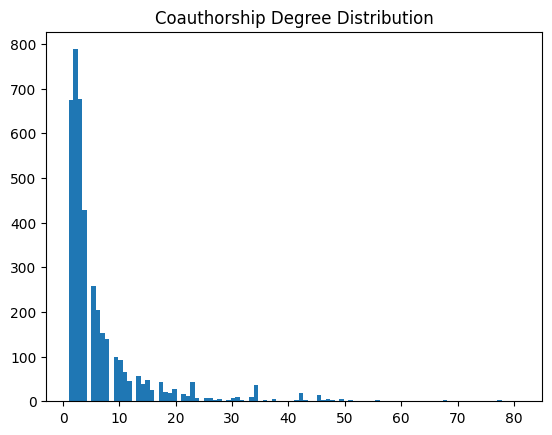

In [9]:
import matplotlib.pyplot as plt

plt.hist(degrees, bins=100)
plt.title("Coauthorship Degree Distribution")
plt.show()

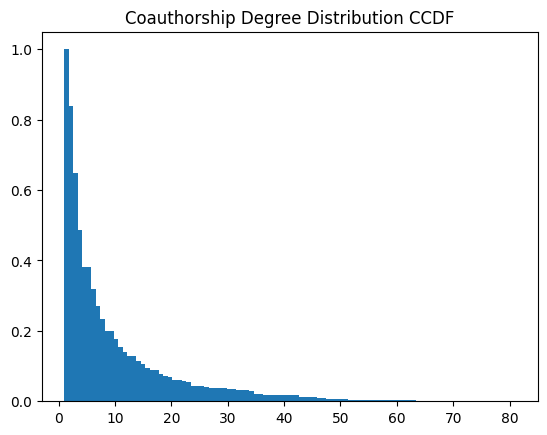

In [8]:
plt.hist(degrees, bins=100, cumulative=-1, density=True)
plt.title("Coauthorship Degree Distribution CCDF")
plt.show()

In [4]:
import networkx as nx

graph = nx.Graph(neighbors)
print(f"Average clustering coefficent: {nx.average_clustering(graph)}")
print(f"Overall clustering coefficient: {nx.transitivity(graph)}")
print(f"Maximal diameter: {nx.diameter(graph)}")
print(f"Average diameter: {nx.average_shortest_path_length(graph)}")

Average clustering coefficent: 0.5568782161697919
Overall clustering coefficient: 0.6288944756689877
Maximal diameter: 17
Average diameter: 6.049380016182999


# 1b

In [5]:
num_triangles = sum(nx.triangles(graph).values()) // 3
print(f"Number of triangles: {num_triangles}")

Number of triangles: 47779


expected number of triangles in erdos-renyi is 
$$
T = \binom{n}{3} \cdot p^3 => p = \frac{T}{\binom{n}{3}}^{\frac{1}{3}}
$$

In [6]:
n = len(neighbors)
p = (num_triangles / (n * (n - 1) * (n - 2) / 6)) ** (1/3)
print(f"Erdos-Renyi p: {p}")

Erdos-Renyi p: 0.015861688593415416


# 1c

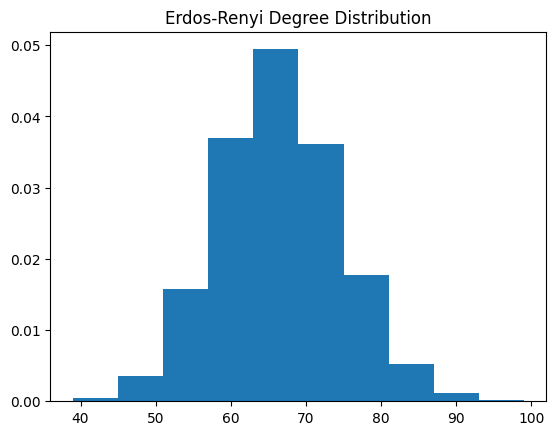

In [7]:
G = nx.erdos_renyi_graph(n, p)
plt.hist([G.degree(u) for u in G.nodes()], density=True)
plt.title("Erdos-Renyi Degree Distribution")
plt.show()